In [1]:
import sys, os, re, copy
import dill as pickle # this serializes all the functions inside the quantification dict
import numpy as np
import scipy as sp
from scipy.optimize import newton, minimize, fsolve
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
import matplotlib.colors as mcolors
import matplotlib.ticker as tck
from matplotlib.gridspec import GridSpec
palette = list(mcolors.TABLEAU_COLORS.keys())
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid", {
 'axes.spines.bottom': True,
 'axes.spines.left': True,
 'axes.spines.right': True,
 'axes.spines.top': True
})
sns.set(font_scale=1)
palette = list(mcolors.TABLEAU_COLORS.keys())
sns.set_theme(style="ticks", palette="muted")
sns.set_context("talk")

In [2]:
AAcode = {
    'Alanine': 'Ala',
    'Arginine': 'Arg',
    'Asparagine': 'Asn',
    'Asparagine-13C4': '*Asn',
    'Aspartate': 'Asp',
    'Glutamate': 'Glu',
    'Glutamine': 'Gln',
    'Glycine': 'Gly',
    'Isoleucine': 'Ile',
    'Leucine': 'Leu',
    'Lysine': 'Lys',
    'Methionine': 'Met',
    'Phenylalanine': 'Phe',
    'Proline': 'Pro',
    'Serine': 'Ser',
    'Threonine': 'Thr',
    'Tryptophan': 'Trp',
    'Tyrosine': 'Tyr',
    'Valine': 'Val'}

AAcode_hd = {
    'Alanine': 'Ala',
    'Arginine': 'Arg',
    'Asparagine': 'Asn',
    'Aspartate': 'Asp+Asn',
    'Glutamate': 'Gln+Glu',
    'Glutamine': 'Gln',
    'Glycine': 'Gly',
    'Isoleucine': 'Ile',
    'Leucine': 'Leu',
    'Lysine': 'Lys',
    'Methionine': 'Met',
    'Phenylalanine': 'Phe',
    'Proline': 'Pro',
    'Serine': 'Ser',
    'Threonine': 'Thr',
    'Tryptophan': 'Trp',
    'Tyrosine': 'Tyr',
    'Valine': 'Val'
}

NB_code = {'Adenine': 'Ade', 'Guanine': 'Gua', 'Uracil': 'Ura', 'Thymine': 'Thy', 'Cytosine': 'Cyt'}

In [3]:
hd_df = pd.read_excel('on-plate-acid-hydrolysis/output/conc_flat.xlsx')

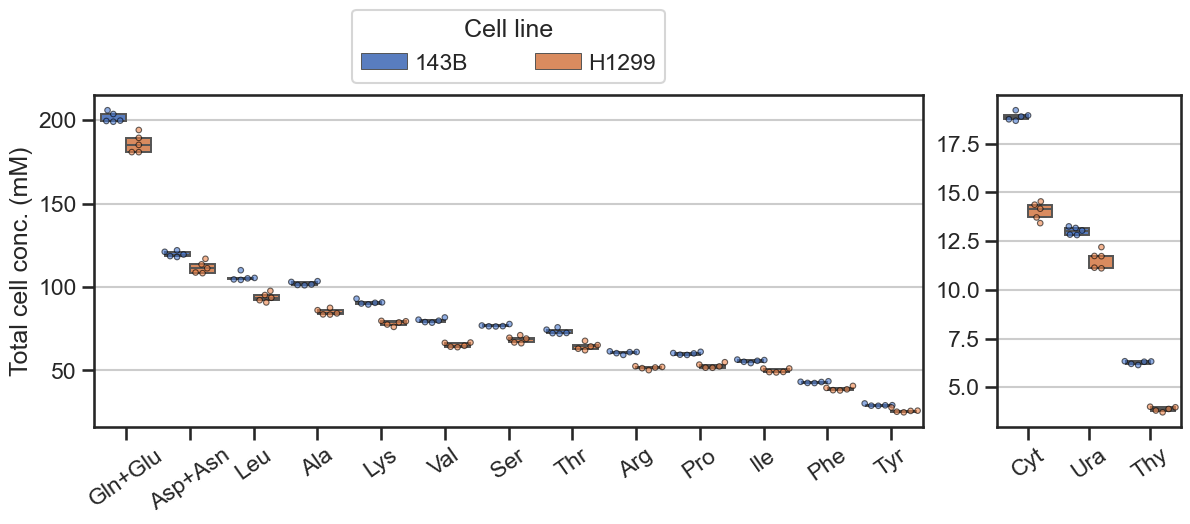

In [4]:
# Create plot grid:
plt_out_nam = 'asp_fate_figures/cell_conc'
fig = plt.figure(figsize=(13, 5))
gs = GridSpec(8, 10)
ax1 = fig.add_subplot(gs[1:8, 0:7])
#ax2 = fig.add_subplot(gs[1:8,6:8], sharey=ax1)
ax2 = fig.add_subplot(gs[1:8, 7:9])
ax3 = fig.add_subplot(gs[0, 2:5])

# Plot the amino acids:
inclusion_list = set(AAcode_hd.values())
mask = [v in inclusion_list for v in hd_df['Compound'].values]
g1 = sns.boxplot(ax=ax1, y='Concentration', x='Compound', hue='cell_line', data=hd_df[mask], dodge=True, whis=False, fliersize=False, linewidth=1.4)
for patch in g1.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 0.7))
g1 = sns.swarmplot(ax=ax1, y='Concentration', x='Compound', hue='cell_line', data=hd_df[mask], edgecolor='black', linewidth=0.8, alpha=0.6, dodge=True, size=4)
g1.grid(True, axis='y')
#g1.set_yscale('log')
g1.set_ylabel('Total cell conc. (mM)');
g1.set_xlabel('');
g1.legend_.remove()
g1.set_xticklabels(g1.get_xticklabels(), rotation=35)

# Plot individual nucleobases:
inclusion_list = set(NB_code.values()) - set(['Ade', 'Gua'])
mask = [v in inclusion_list for v in hd_df['Compound'].values]
g2 = sns.boxplot(ax=ax2, y='Concentration', x='Compound', hue='cell_line', data=hd_df[mask], dodge=True, whis=False, fliersize=False, linewidth=1.4)
for patch in g2.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 0.7))
g2 = sns.swarmplot(ax=ax2, y='Concentration', x='Compound', hue='cell_line', data=hd_df[mask], edgecolor='black', linewidth=0.8, alpha=0.6, dodge=True, size=4)
g2.grid(True, axis='y')
#g2.set_yscale('log')
g2.set_ylabel('');
g2.set_xlabel('');
g2.set_xticklabels(g2.get_xticklabels(), rotation=35);
#g2.set(yticklabels=[]);

# Add legend above:
old_legend = g2.legend_
handles = old_legend.legend_handles
labels = ['143B', 'H1299']
title = 'Cell line'
g2.legend_.remove()
ax3.axis('off')
ax3.legend(handles, labels, title=title, bbox_to_anchor=(0, 0, 1, 1), loc="lower center", mode="expand", borderaxespad=0, ncol=2, handletextpad=0.3);

# Spacing and print:
#fig.tight_layout(pad=0., w_pad=1.3, h_pad=1.0)
gs.tight_layout(fig, pad=0, w_pad=0.5, h_pad=0.5)
#fig.subplots_adjust(wspace=0.4, hspace=0.3)
fig.savefig('{}.pdf'.format(plt_out_nam), bbox_inches='tight');
inclusion_list = set(AAcode_hd.values()).union(set(NB_code.values()) - set(['Ade', 'Gua']))
mask = [v in inclusion_list for v in hd_df['Compound'].values]
hd_df.loc[mask, ['cell_line', 'Compound', 'Concentration']]\
    .reset_index(drop=True)\
    .to_excel('{}.xlsx'.format(plt_out_nam), index=False, sheet_name=plt_out_nam.split('/')[-1])

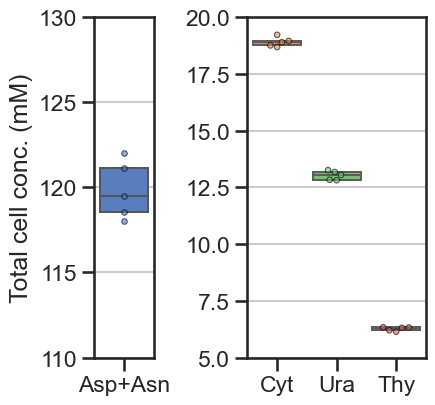

In [5]:
# Create plot grid:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(4.7, 4.4), gridspec_kw={'width_ratios': [1, 3]})
col_pal = sns.color_palette()

# Plot the amino acids:
inclusion_list = set(['Asp+Asn'])
mask = np.array([v in inclusion_list for v in hd_df['Compound'].values]) & (hd_df['cell_line'] == '143B')
g1 = sns.boxplot(ax=ax1, y='Concentration', x='Compound', data=hd_df[mask], \
                 dodge=True, whis=False, fliersize=False, linewidth=1.4, color=col_pal[0])
g1 = sns.swarmplot(ax=ax1, y='Concentration', x='Compound', data=hd_df[mask], edgecolor='black', \
                   linewidth=0.8, alpha=0.6, dodge=True, size=4, color=col_pal[0])
g1.grid(True, axis='y')
g1.set_ylim([110, 130])
#g1.set_yscale('log')
g1.set_ylabel('Total cell conc. (mM)');
g1.set_xlabel('');
g1.set_xticklabels(g1.get_xticklabels(), rotation=0)

# Plot individual nucleobases:
inclusion_list = set(NB_code.values()) - set(['Ade', 'Gua'])
mask = np.array([v in inclusion_list for v in hd_df['Compound'].values])  & (hd_df['cell_line'] == '143B')
cpal = col_pal[1:4]
g2 = sns.boxplot(ax=ax2, y='Concentration', x='Compound', data=hd_df[mask], \
                 dodge=True, whis=False, fliersize=False, linewidth=1.4, palette=cpal)
g2 = sns.swarmplot(ax=ax2, y='Concentration', x='Compound', hue='Compound', data=hd_df[mask], edgecolor='black', \
                   linewidth=0.8, alpha=0.6, dodge=False, size=4, palette=cpal, legend=False)
g2.grid(True, axis='y')
g2.set_ylim([5, 20])
#g2.set_yscale('log')
g2.set_ylabel('');
g2.set_xlabel('');
g2.set_xticklabels(g2.get_xticklabels(), rotation=0);
#g2.set(yticklabels=[]);


# Show/save:
fig.tight_layout()
fig.savefig('asp_fate_figures/cell_conc_143B_Asn_Asp_Pyr.pdf', bbox_inches='tight')

In [6]:
wt_df = pd.read_excel('Asn-consumption-flux_143B/output/influx_flat.xlsx')
wt_df['Cell line'] = 'WT'
wt_label_df = pd.read_excel('Asn-consumption-flux_143B/output/asn_intra_labelling.xlsx')
wt_label_df = wt_label_df.pivot(index='Replicate', columns='Metab', values='Area').reset_index()
wt_label_df['Asn/Asn_13C4'] = wt_label_df['Asn'] / wt_label_df['Asn_13C4']

dko_df = pd.read_excel('AA_influx_143B-GOT-DKO/output/influx_flat.xlsx')
dko_df['Cell line'] = 'DKO'

# df_flux = pd.concat([wt_df, dko_df])

In [7]:
# Calculate Asn fluxes:
mask = (wt_df['Amino acid'].isin(['*Asn', 'Asn'])) & (wt_df['Time'] == 24)
asn_flux_df = wt_df.loc[mask, ['Replicate', 'Amino acid', 'Flux']].reset_index(drop=True).copy()
asn_flux_df = asn_flux_df.pivot(index='Replicate', columns='Amino acid', values='Flux').reset_index().rename_axis(None, axis=1)
asn_flux_df = asn_flux_df.merge(wt_label_df.loc[:, ['Replicate', 'Asn/Asn_13C4']], on='Replicate')
asn_flux_df['Asn_13C4/Asn'] = 1/asn_flux_df['Asn/Asn_13C4']
asn_flux_df['*Asn_percent'] = (asn_flux_df['Asn_13C4/Asn'] / (1 + asn_flux_df['Asn_13C4/Asn'])) * 100
asn_flux_df['Asn_percent'] = (asn_flux_df['Asn/Asn_13C4'] / (1 + asn_flux_df['Asn/Asn_13C4'])) * 100
asn_flux_df['X_dummy'] = 0

asn_flux_df['J_prot'] = asn_flux_df['*Asn'] * (1 + asn_flux_df['Asn/Asn_13C4'])
asn_flux_df['Asn_efflux'] = (asn_flux_df['Asn'] * (1 + 1/asn_flux_df['Asn/Asn_13C4'])) * -1

In [8]:
asn_flux_df

,Replicate,*Asn,Asn,Asn/Asn_13C4,Asn_13C4/Asn,*Asn_percent,Asn_percent,X_dummy,J_prot,Asn_efflux
0,1,1.343054,-0.543034,0.290161,3.446359,77.509690,22.490310,0,1.732757,2.414526
1,2,1.374207,-0.551999,0.306994,3.257391,76.511435,23.488565,0,1.796080,2.350077
2,3,1.219416,-0.565914,0.294400,3.396737,77.255858,22.744142,0,1.578413,2.488174
3,4,1.076012,-0.562474,0.300407,3.328821,76.899022,23.100978,0,1.399254,2.434850
4,5,1.160893,-0.554229,0.300318,3.329807,76.904281,23.095719,0,1.509530,2.399703
5,6,1.229171,-0.555091,0.297054,3.366392,77.097798,22.902202,0,1.594301,2.423747


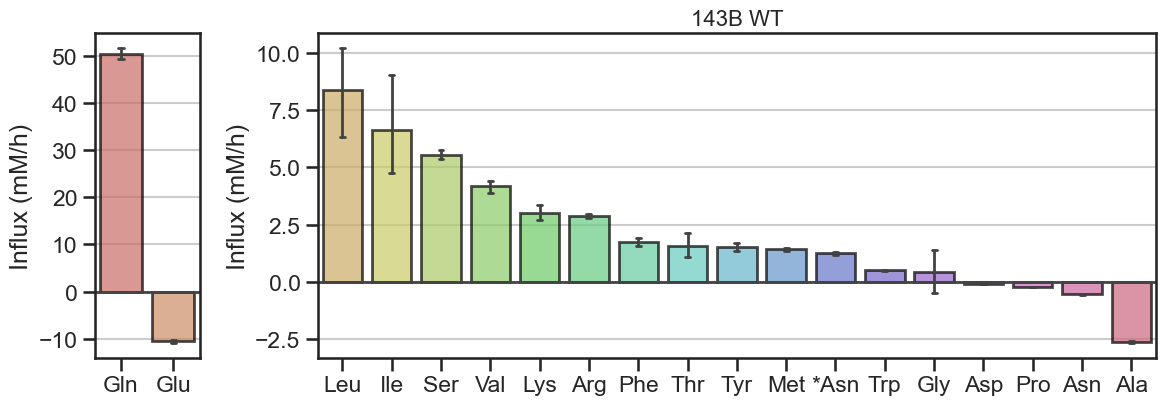

In [9]:
### Plot the WT influx, only 24 h sampling time ###
plt_out_nam = 'asp_fate_figures/WT_influx'
col_pal = sns.color_palette("hls", 19)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4.4), gridspec_kw={'width_ratios': [1, 8]})

# Small plot for Gln/Glu:
mask = (wt_df['Amino acid'].isin(['Gln', 'Glu'])) & (wt_df['Time'] == 24)
order = wt_df[mask].groupby('Amino acid').mean(numeric_only=True)['Flux'].sort_values(ascending=False).index.values
cpal = col_pal[0:2]
g1 = sns.barplot(ax=ax1, x="Amino acid", y="Flux", data=wt_df[mask], capsize=.1, errwidth=2, \
                 edgecolor='black', linewidth=2, alpha=0.7, order=order, palette=cpal)
ax1.axhline(y=0, linestyle='-', zorder=1, linewidth=2, color='#444444')
g1.grid(True, axis='y')
#g1.set_yscale('log')
g1.set_ylabel('Influx (mM/h)');
g1.set_xlabel('');
g1.set_xticklabels(g1.get_xticklabels(), rotation=0)

# Plot the all other AAs:
mask2 = (wt_df['Amino acid'].isin(list(AAcode.values()))) & (wt_df['Time'] == 24)
order = wt_df[~mask&mask2].groupby('Amino acid').mean(numeric_only=True)['Flux'].sort_values(ascending=False).index.values
cpal = col_pal[2:]
g2 = sns.barplot(ax=ax2, x="Amino acid", y="Flux", data=wt_df[~mask&mask2], capsize=.1, errwidth=2, \
                 edgecolor='black', linewidth=2, alpha=0.7, order=order, palette=cpal)
ax2.axhline(y=0, linestyle='-', zorder=1, linewidth=2, color='#444444')
g2.grid(True, axis='y')
g2.set_ylabel('Influx (mM/h)');
g2.set_xlabel('');
g2.set_xticklabels(g2.get_xticklabels(), rotation=0);
#g2.set_ylim([-1.4, 5.6])
#g2.yaxis.set_major_locator(ticker.MultipleLocator(1))
g2.set_title('143B WT', size=16)
#fig.suptitle('143B WT', size=16)

# Show/save:
fig.tight_layout()
fig.savefig('{}.pdf'.format(plt_out_nam), bbox_inches='tight');
wt_df.loc[mask2, ['Amino acid', 'Flux']]\
    .reset_index(drop=True)\
    .to_excel('{}.xlsx'.format(plt_out_nam), index=False, sheet_name=plt_out_nam.split('/')[-1])

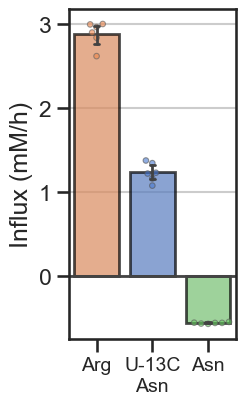

In [10]:
### Plot the WT influx ###
col_pal = sns.color_palette()

wt_df_rn = wt_df.replace({'*Asn': 'U-13C\nAsn'})


fig, ax1 = plt.subplots(1, 1, figsize=(2.8, 4.4))

# Small plot for Gln/Glu:
cpal = [col_pal[1], col_pal[0], col_pal[2]]
mask = (wt_df_rn['Amino acid'].isin(['Arg', 'U-13C\nAsn', 'Asn'])) & (wt_df_rn['Time'] == 24)
g1 = sns.barplot(ax=ax1, x="Amino acid", y="Flux", data=wt_df_rn[mask], capsize=.1, errwidth=2, \
                 edgecolor='black', linewidth=2, alpha=0.7, palette=cpal)

g1 = sns.swarmplot(ax=ax1, x="Amino acid", y="Flux", hue="Amino acid", data=wt_df_rn[mask], \
                   linewidth=0.8, alpha=0.6, dodge=False, size=4, palette=cpal, legend=False, zorder=1)

ax1.axhline(y=0, linestyle='-', zorder=1, linewidth=2, color='#444444')
g1.grid(True, axis='y')
#g1.set_yscale('log')
g1.set_ylabel('Influx (mM/h)');
g1.set_xlabel('');
g1.set_xticklabels(g1.get_xticklabels(), rotation=0, size=14) #, rotation_mode='anchor', ha='right');

# Show/save:
fig.tight_layout()
fig.savefig('asp_fate_figures/WT_influx_Arg_Asn.pdf', bbox_inches='tight')

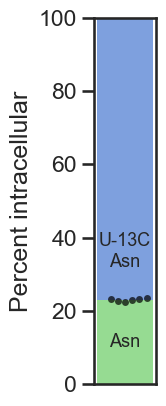

In [11]:
col_pal = sns.color_palette()
cpal = [col_pal[2], col_pal[0]]


plt_out_nam = 'asp_fate_figures/WT_Asn_label_ratio'
fig, ax1 = plt.subplots(1, 1, figsize=(2, 4.4))

bar_values = asn_flux_df.mean()[['Asn_percent', '*Asn_percent']].values


g1 = sns.swarmplot(ax=ax1, x="X_dummy", y="Asn_percent", data=asn_flux_df, \
                   alpha=0.7, color='black')


p = ax1.bar(0, height=bar_values[0], color=cpal[0], alpha=0.7, linewidth=0)
p = ax1.bar(0, height=bar_values[1], color=cpal[1], alpha=0.7, bottom=bar_values[0], linewidth=0)

ax1.set_ylim([0, 100])
ax1.set_xlabel('');
ax1.set_ylabel('Percent intracellular');
ax1.text(0, 10, 'Asn', ha='center', size=13)
ax1.text(0, 32, 'U-13C\nAsn', ha='center', size=13)
ax1.set_xticklabels('')
ax1.xaxis.set_major_locator(plt.NullLocator())


# Show/save:
fig.tight_layout()
fig.savefig('{}.pdf'.format(plt_out_nam), bbox_inches='tight');
asn_flux_df.loc[:, ['Asn_percent', '*Asn_percent']]\
    .reset_index(drop=True)\
    .to_excel('{}.xlsx'.format(plt_out_nam), index=False, sheet_name=plt_out_nam.split('/')[-1])

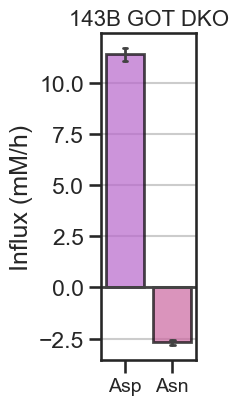

In [12]:
### Plot the DKO influx, averaging over the sampling times ###
col_pal = sns.color_palette("hls", 19)

plt_out_nam = 'asp_fate_figures/DKO_influx_Asp_Asn'
fig, ax1 = plt.subplots(1, 1, figsize=(2.4, 4.4))

mask = (dko_df['Amino acid'].isin(['Asp', 'Asn']))
cpal = [col_pal[15], col_pal[17]]
g1 = sns.barplot(ax=ax1, x="Amino acid", y="Flux", data=dko_df[mask], capsize=.1, errwidth=2, \
                 edgecolor='black', linewidth=2, alpha=0.7, palette=cpal)
ax1.axhline(y=0, linestyle='-', zorder=1, linewidth=2, color='#444444')
g1.grid(True, axis='y')
#g1.set_yscale('log')
g1.set_ylabel('Influx (mM/h)');
g1.set_xlabel('');
g1.set_xticklabels(g1.get_xticklabels(), rotation=0, size=14) #, rotation_mode='anchor', ha='right');
g1.set_title('143B GOT DKO', size=16)

# Show/save:
fig.tight_layout()
fig.savefig('{}.pdf'.format(plt_out_nam), bbox_inches='tight');
dko_df.loc[:, ['Amino acid', 'Flux']]\
    .reset_index(drop=True)\
    .to_excel('{}.xlsx'.format(plt_out_nam), index=False, sheet_name=plt_out_nam.split('/')[-1])

In [13]:
# Extract all aspartate fluxes:
asp_fluxes = asn_flux_df.loc[:, ['Replicate', 'J_prot', 'Asn_efflux']]\
  .rename(columns={'J_prot': 'Protein (Asn)', 'Asn_efflux': 'Efflux (Asn)*'})\
  .melt(id_vars=['Replicate'], var_name='Type', value_name='Flux').copy()

In [14]:
# Calculate aspartate consumption flux:
mask = (hd_df['Compound'] == 'Asp+Asn') & (hd_df['cell_line'] == '143B')
asp_acc = hd_df[mask].copy()

prlfr = 1.278224221 # doublings per day for 143B (from Asn consumption assay)
asp_acc['Flux'] = prlfr/24 * np.log(2) * asp_acc['Concentration']
asp_acc['Protein (Asp)'] = asp_acc['Flux'] - asn_flux_df.mean()['J_prot']
asp_acc = asp_acc.rename(columns={'well': 'Replicate'})
asp_prot = asp_acc.loc[:, ['Replicate', 'Protein (Asp)']].melt(id_vars=['Replicate'], var_name='Type', value_name='Flux').copy()

In [15]:
# Calculate pyrimidine/purine flux 
inclusion_list = set(NB_code.values()) - set(['Ade', 'Gua'])
mask = np.array([v in inclusion_list for v in hd_df['Compound'].values])  & (hd_df['cell_line'] == '143B')
pyr_acc = hd_df[mask].pivot(index='well', columns='Compound', values='Concentration').reset_index()
pyr_acc['Pyr_conc'] = pyr_acc.loc[:, ['Cyt', 'Thy', 'Ura']].sum(axis=1)

pyr_acc['Pyrimidines'] = prlfr/24 * np.log(2) * pyr_acc['Pyr_conc']
pyr_acc = pyr_acc.rename(columns={'well': 'Replicate'})
pyr = pyr_acc.loc[:, ['Replicate', 'Pyrimidines']].melt(id_vars=['Replicate'], var_name='Type', value_name='Flux').copy()

pur = pyr.loc[0:0, :].copy()
pur['Type'] = 'Purines'
pur['Flux'] = 1.5 * pyr['Flux'].mean()

In [16]:
# Get Arginine fluxes:
mask = (wt_df['Amino acid'] == 'Arg') & (wt_df['Time'] == 24)
arg_prot = wt_df[mask].copy()
arg_prot['Type'] = 'Protein (Arg)'
arg_prot = arg_prot.loc[:, ['Replicate', 'Type', 'Flux']].copy()

In [17]:
asp_fluxes = pd.concat([asp_fluxes, asp_prot, pyr, pur, arg_prot]).reset_index(drop=True)
asp_fluxes['Nitrogen donation'] = asp_fluxes['Type'].isin(['Protein (Arg)', 'Purines'])

In [18]:
asp_fluxes.head(3)

,Replicate,Type,Flux,Nitrogen donation
0,1,Protein (Asn),1.732757,False
1,2,Protein (Asn),1.796080,False
2,3,Protein (Asn),1.578413,False


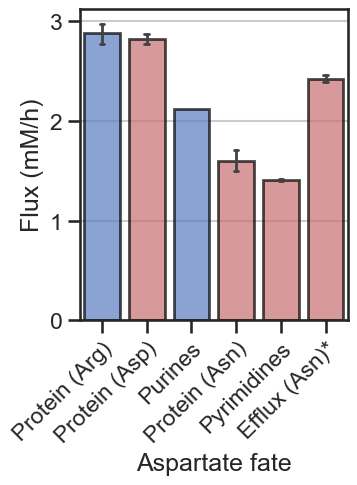

In [19]:
pal = list(sns.color_palette())
order = ['Protein (Arg)', 'Protein (Asp)', 'Purines', 'Protein (Asn)', 'Pyrimidines', 'Efflux (Asn)*']
col = [pal[0], pal[3], pal[0], pal[3], pal[3], pal[3]]

plt_out_nam = 'asp_fate_figures/asp_fate'
fig, ax1 = plt.subplots(1, 1, figsize=(4, 5.2))

#g1 = sns.barplot(ax=ax1, x="Fate", y="Flux", hue="Asn efflux", data=asp_fluxes, capsize=.1, errwidth=2, edgecolor='black', linewidth=2, alpha=0.7)
#pal = list(sns.color_palette())
#pal[5] = pal[7]
g1 = sns.barplot(ax=ax1, x="Type", y="Flux", data=asp_fluxes, capsize=.1, \
                 errwidth=2, edgecolor='black', linewidth=2, alpha=0.7, order=order, palette=col)

g1.grid(True, axis='y')
g1.set_ylabel('Flux (mM/h)');
g1.set_xlabel('Aspartate fate');
g1.set_xticklabels(g1.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor');

fig.tight_layout()
fig.savefig('{}.pdf'.format(plt_out_nam), bbox_inches='tight');
asp_fluxes.reset_index(drop=True)\
    .to_excel('{}.xlsx'.format(plt_out_nam), index=False, sheet_name=plt_out_nam.split('/')[-1])

In [20]:
asp_fluxes_tab = asp_fluxes.pivot(index='Replicate', columns='Type', values='Flux').reset_index()

In [21]:
asp_fluxes_tab.mean()[['Efflux (Asn)*', 'Protein (Asn)', 'Protein (Asp)', 'Pyrimidines', 'Purines']].sum()

10.365969039582566

In [2]:
plot_df = pd.read_excel('asp_fate_plotting.xlsx')
plot_df

,Fate,Asn efflux,Percent
0,Protein (Asp),Yes,27.935361
1,Efflux (Asn),Yes,25.992724
2,Protein (Asn),Yes,17.268010
3,Pyrimidines,Yes,14.401952
4,Purines,Yes,14.401952
5,Protein (Asp),No,37.746777
6,Efflux (Asn),No,0.000000
7,Protein (Asn),No,23.332855
8,Pyrimidines,No,19.460184
9,Purines,No,19.460184


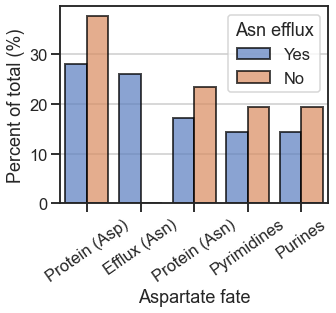

In [3]:
fig, ax1 = plt.subplots(1, 1, figsize=(5, 4.7))

g1 = sns.barplot(ax=ax1, x="Fate", y="Percent", hue="Asn efflux", data=plot_df, capsize=.1, errwidth=2, edgecolor='black', linewidth=2, alpha=0.7)

g1.grid(True, axis='y')
g1.set_ylabel('Percent of total (%)');
g1.set_xlabel('Aspartate fate');
g1.set_xticklabels(g1.get_xticklabels(), rotation=35);

fig.tight_layout()
fig.savefig('asp_fate.pdf')

In [4]:
plot_df = pd.read_excel('asp_fate2_plotting.xlsx')
plot_df

,Fate,Flux,Percent,Nitrogen donation
0,Protein (Arg),2.881181,22.506423,True
1,Protein (Asp),2.585267,20.194886,False
2,Purines,1.999235,15.617077,True
3,Protein (Asn),1.598061,12.483300,False
4,Pyrimidines,1.332823,10.411384,False
5,Efflux (Asn)*,2.405026,18.786930,False


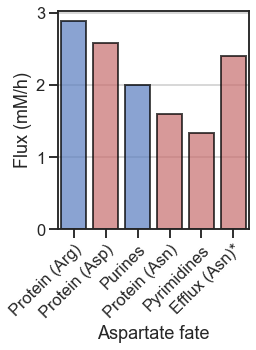

In [7]:
pal = list(sns.color_palette())
new_pal = [pal[0] if nd else pal[3] for nd in plot_df['Nitrogen donation']]
#new_pal[-1] = pal[7]


fig, ax1 = plt.subplots(1, 1, figsize=(4, 5.2))

#g1 = sns.barplot(ax=ax1, x="Fate", y="Flux", hue="Asn efflux", data=plot_df, capsize=.1, errwidth=2, edgecolor='black', linewidth=2, alpha=0.7)
#pal = list(sns.color_palette())
#pal[5] = pal[7]
g1 = sns.barplot(ax=ax1, x="Fate", y="Flux", data=plot_df, capsize=.1, errwidth=2, edgecolor='black', linewidth=2, alpha=0.7, palette=new_pal)

g1.grid(True, axis='y')
g1.set_ylabel('Flux (mM/h)');
g1.set_xlabel('Aspartate fate');
g1.set_xticklabels(g1.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor');

fig.tight_layout()
fig.savefig('asp_fate2.pdf')